In [1]:
#Calculate the rate of return for the following securties
# GE, Ford, Microsoft, AMAZON 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as web

In [4]:
tickers = ["GE", "F", "MSFT", "AMZN"]
data_frame = pd.DataFrame()
for t in tickers:
    data_frame[t] = web.DataReader(t, data_source = "yahoo", start = "2001-1-1")["Adj Close"]

In [5]:
data_frame

,GE,F,MSFT,AMZN
Date,,,,
2001-01-02,23.312727,13.555584,14.000292,13.875000
2001-01-03,25.477486,14.008603,15.472949,17.562500
2001-01-04,25.610699,15.019167,15.634336,15.500000
2001-01-05,25.211050,14.635847,15.856245,14.562500
2001-01-08,24.278542,14.287378,15.795717,14.937500
...,...,...,...,...
2019-11-12,11.420000,9.040000,147.070007,1778.000000
2019-11-13,11.290000,8.810000,147.309998,1753.109985
2019-11-14,11.290000,8.790000,148.059998,1754.599976


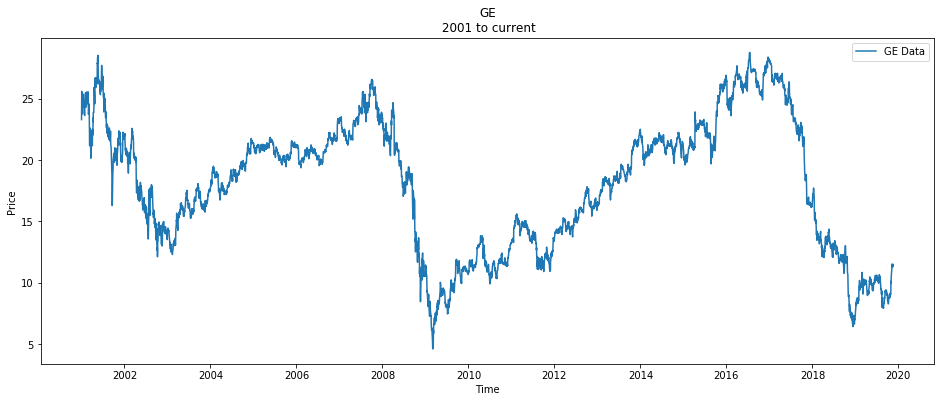

In [16]:
# lets plot each security on a graph 
plt.figure(figsize=(16,6))
plt.plot(data_frame.index[0:],data_frame["GE"], label = "GE Data")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("GE\n 2001 to current")
plt.legend()
plt.show()


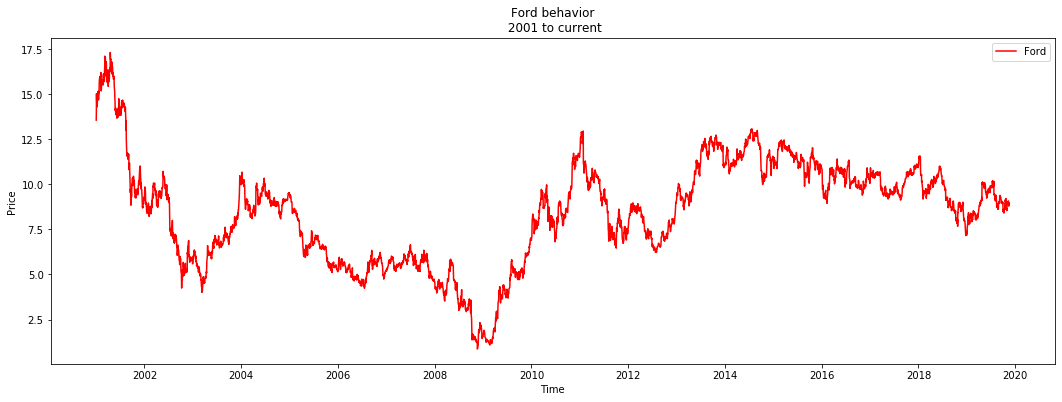

In [17]:
#lets plot ford
plt.figure(figsize=(18,6))
plt.plot(data_frame.index[0:], data_frame["F"], label = "Ford", color = "r")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Ford behavior\n 2001 to current")
plt.legend()
plt.show()

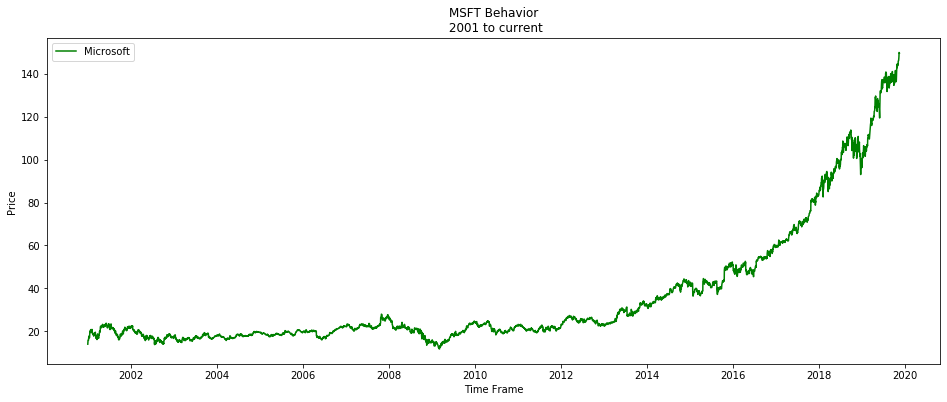

In [20]:
#lets plot Microsoft
plt.figure(figsize=(16,6))
plt.plot(data_frame.index[0:], data_frame["MSFT"], label = "Microsoft", color = "g")
plt.xlabel("Time Frame")
plt.ylabel("Price")
plt.title("MSFT Behavior\n 2001 to current")
plt.legend()
plt.show()

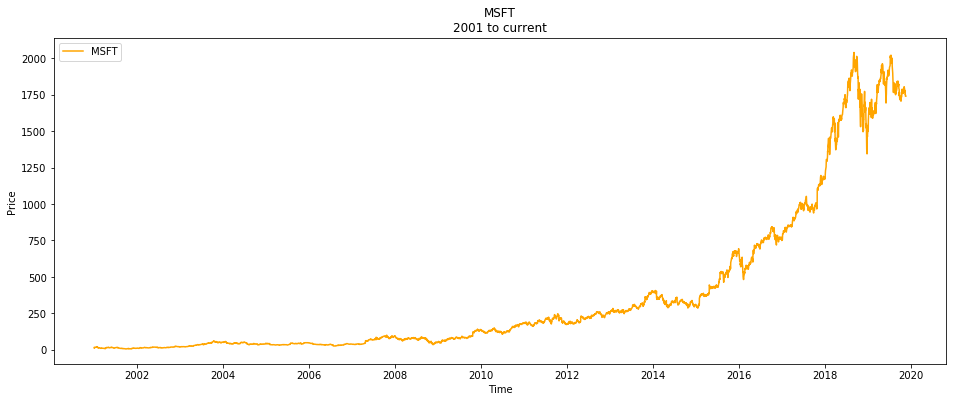

In [26]:
#Amazon 
plt.figure(figsize=(16,6))
plt.plot(data_frame.index[0:],data_frame["AMZN"], label = "MSFT", color = "orange")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("MSFT\n2001 to current")
plt.legend()
plt.show()

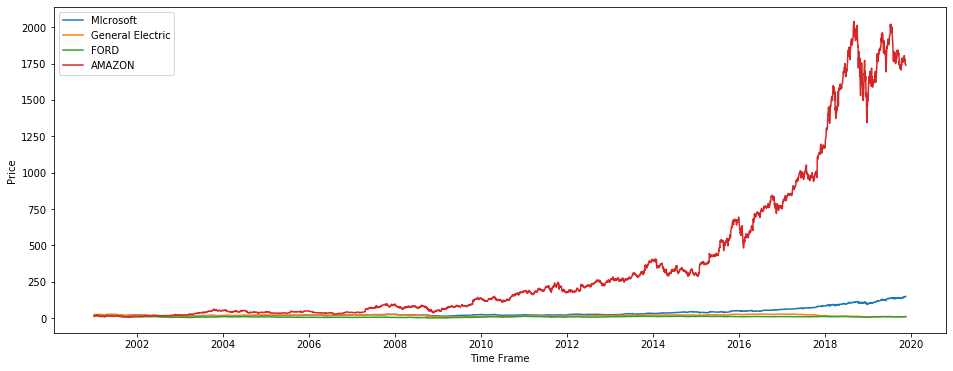

In [30]:
#lets put it all together 
plt.figure(figsize=(16,6))
plt.plot(data_frame.index[0:], data_frame["MSFT"], label = "MIcrosoft")
plt.plot(data_frame.index[0:], data_frame["GE"], label = "General Electric")
plt.plot(data_frame.index[0:], data_frame["F"], label = "FORD")
plt.plot(data_frame.index[0:], data_frame["AMZN"], label = "AMAZON")
plt.xlabel("Time Frame")
plt.ylabel("Price")
plt.legend()
plt.show()

In [32]:
#we all calculate the simple return on the pprtfolio 
simple_return = (data_frame/data_frame.shift(1)) - 1
simple_return.tail()

,GE,F,MSFT,AMZN
Date,,,,
2019-11-12,0.006167,-0.004405,0.006570,0.003584
2019-11-13,-0.011384,-0.025442,0.001632,-0.013999
2019-11-14,0.000000,-0.002270,0.005091,0.000850
2019-11-15,0.020372,0.018202,0.012900,-0.008612
2019-11-18,-0.015191,0.000290,-0.001987,-0.000034


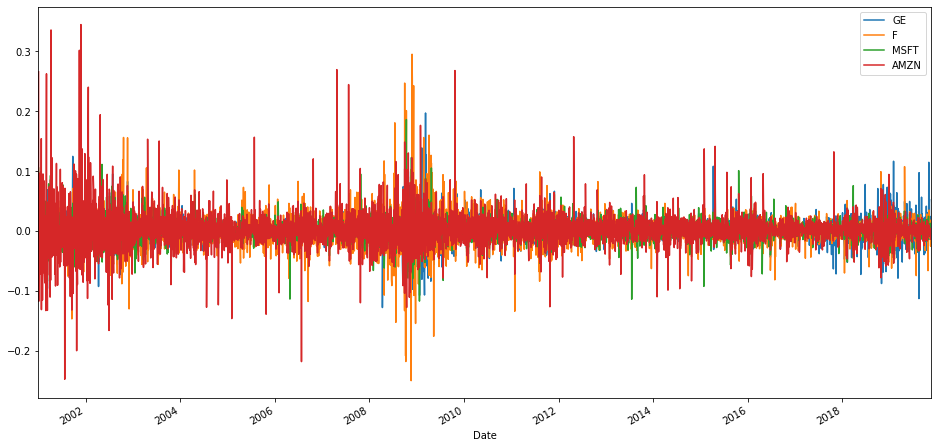

In [35]:
simple_return.plot(figsize = (16,8))
plt.show()

In [36]:
#let check the correlation of the stocks in the portfoio 
data_frame.corr()

,GE,F,MSFT,AMZN
GE,1.000000,0.343079,-0.190539,-0.218583
F,0.343079,1.000000,0.277359,0.274462
MSFT,-0.190539,0.277359,1.000000,0.983512
AMZN,-0.218583,0.274462,0.983512,1.000000


From the corrrelation matrix above we see that the only correelated securities in the portfolio 
is Microsoft and and AMAZON with a correlation coeficient of .98
lets maybe condust a linear regression to  see if there is predictive capibiity between the two

In [39]:
import statsmodels.api as sm
from scipy import stats

In [41]:
x_con = sm.add_constant(data_frame["MSFT"])
msft_Amz_model = sm.OLS(data_frame["AMZN"], x_con).fit()

In [42]:
msft_Amz_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AMZN   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                 1.404e+05
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:40:21   Log-Likelihood:                -28286.
No. Observations:                4750   AIC:                         5.658e+04
Df Residuals:                    4748   BIC:                         5.659e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -254.8170      2.146   -118.734      0.000    -259.024    -250.610
MSFT          17.2914      0.046    374.744      0.000      17.201      17.382
==============================================================================
Omnibus:                      738.904   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5549.184
Skew:                          -0.528   Prob(JB):                         0.00
Kurtosis:                       8.189   Cond. No.                         73.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get a 97% r_squared value for the data.  Meaning the 97% of Amazon and be explained be Misrosoft. The predictive ability is strong here

In [43]:
regressionLine = msft_Amz_model.predict()
regressionLine

array([ -12.7322513 ,   12.73205977,   15.52265881, ..., 2305.34831785,
       2338.37496335, 2333.2220531 ])

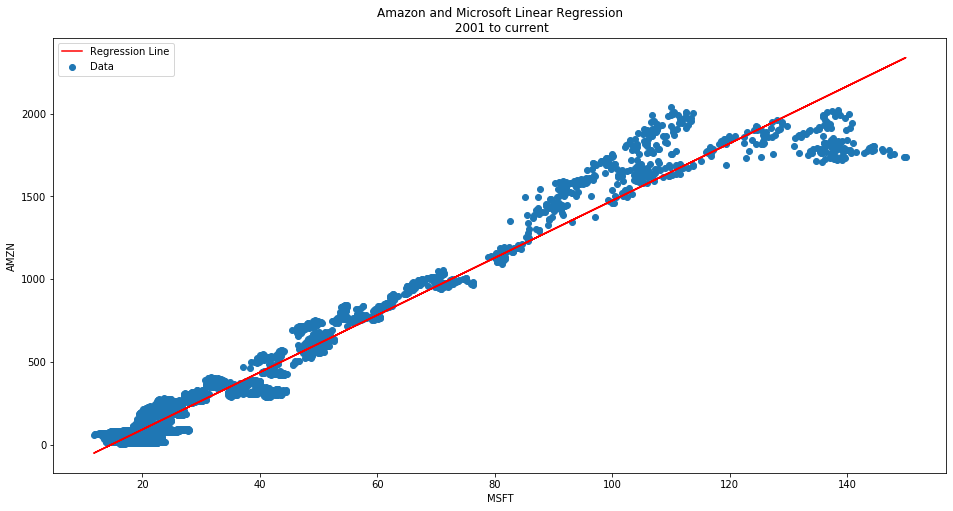

In [49]:
# we will start with a scatter plot 
plt.figure(figsize=(16,8))
plt.scatter(data_frame["MSFT"], data_frame["AMZN"], label = "Data")
#Lets add the regression line on the data 
plt.plot(data_frame["MSFT"], regressionLine, label = "Regression Line", color = "r")
plt.xlabel("MSFT")
plt.ylabel("AMZN")
plt.title("Amazon and Microsoft Linear Regression\n 2001 to current")
plt.legend()
plt.show()